# COSC 3337 Project
## Members:
- Elie Bonkoungou
- Saroj Kapali
- Minh Nguyen

### __About The Data__

The data we'll be using comes from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality), and contains the following attributes about red wine:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dixoide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol (%)
- quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, make_scorer, confusion_matrix, classification_report, roc_auc_score, recall_score, precision_score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

**DATA EXPLORATION**

In [2]:
#Read dataset
url = 'https://raw.githubusercontent.com/edx100/Wine-Prediction/main/winequality-red.csv'
data = pd.read_csv(url, sep=";")

In [3]:
#Display first 5 lines
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
data.shape

(1599, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# Check for missing values in each column
missing_values = data.isnull().sum()

print(missing_values)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [10]:
# Check if any null values exist in the dataset
if data.isnull().any().any():
    print("There are null values in the dataset.")
else:
    print("There are no null values in the dataset.")

There are no null values in the dataset.


In [11]:
# Find the number of unique values in each column
unique_values = data.nunique()

print(unique_values)

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64


In [12]:
# Checking for Duplicate Value
print("The total number of duplicated records: ", data.duplicated().sum())

The total number of duplicated records:  240


In [13]:
data = data.drop_duplicates()

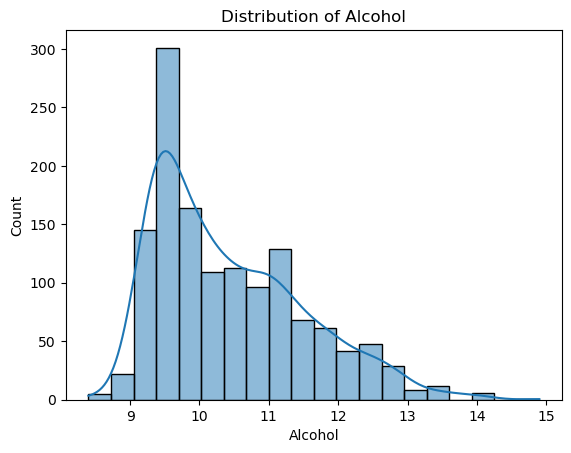

In [14]:
# Create a histogram of alcohol content
sns.histplot(data['alcohol'], bins=20, kde=True)
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.title('Distribution of Alcohol')
plt.show()

- The graph displays the frequency distribution of alcohols. It appears that the highest frequencies are concentrated in the range of 9 to 10. In contrast, the frequency distribution appears to be lower in the ranges of 0 to 9 and 14 to 15.

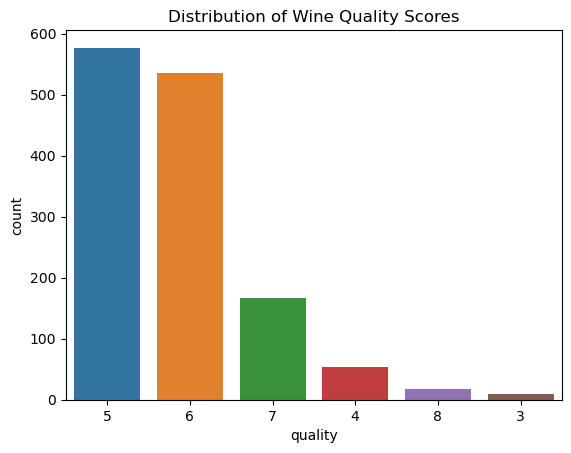

In [15]:
sns.countplot(x=data['quality'], order=data['quality'].value_counts().index)
plt.title('Distribution of Wine Quality Scores')
plt.show()

- In this dataset, most records show that the wine quality is around 5 or 6, which can be considered medium.

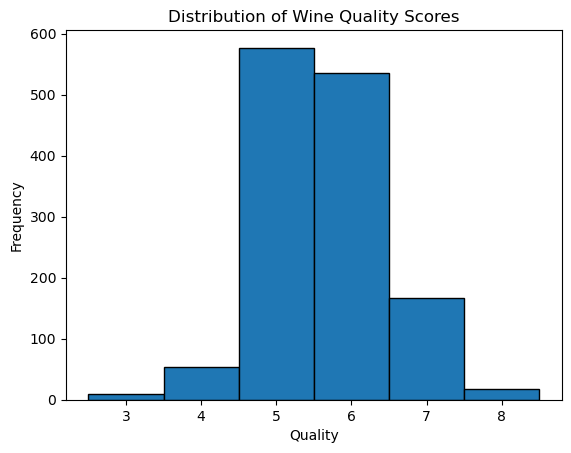

In [16]:
# Plot a histogram of the 'quality' variable
plt.hist(data['quality'], bins=range(3, 10), align='left', edgecolor='black')

# Add axis labels and title
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Wine Quality Scores')

# Display the plot
plt.show()


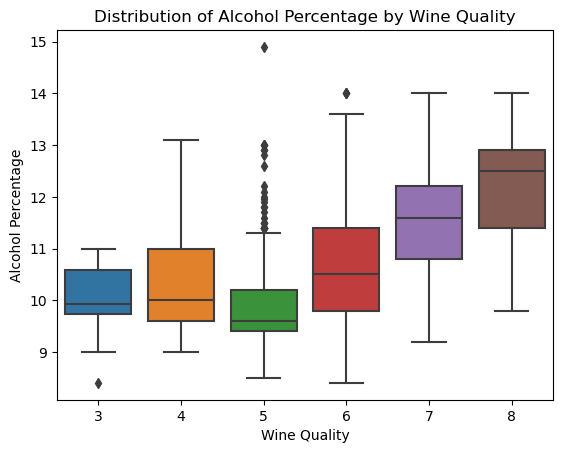

In [17]:
import seaborn as sns

sns.boxplot(x='quality', y='alcohol', data=data)
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Percentage')
plt.title('Distribution of Alcohol Percentage by Wine Quality')
plt.show()


- According to the histogram, the distribution of alcohol quality in the red wine dataset is skewed towards the right, indicating that there are more wines with higher alcohol quality. Most of the wines have an alcohol quality between 5 and 6. However, the frequency of wines with an alcohol quality between 0-4 and 7-8 is relatively lower, indicating that there are fewer wines with these alcohol qualities in the dataset. So its hard to find the wine with high quality(7-9).

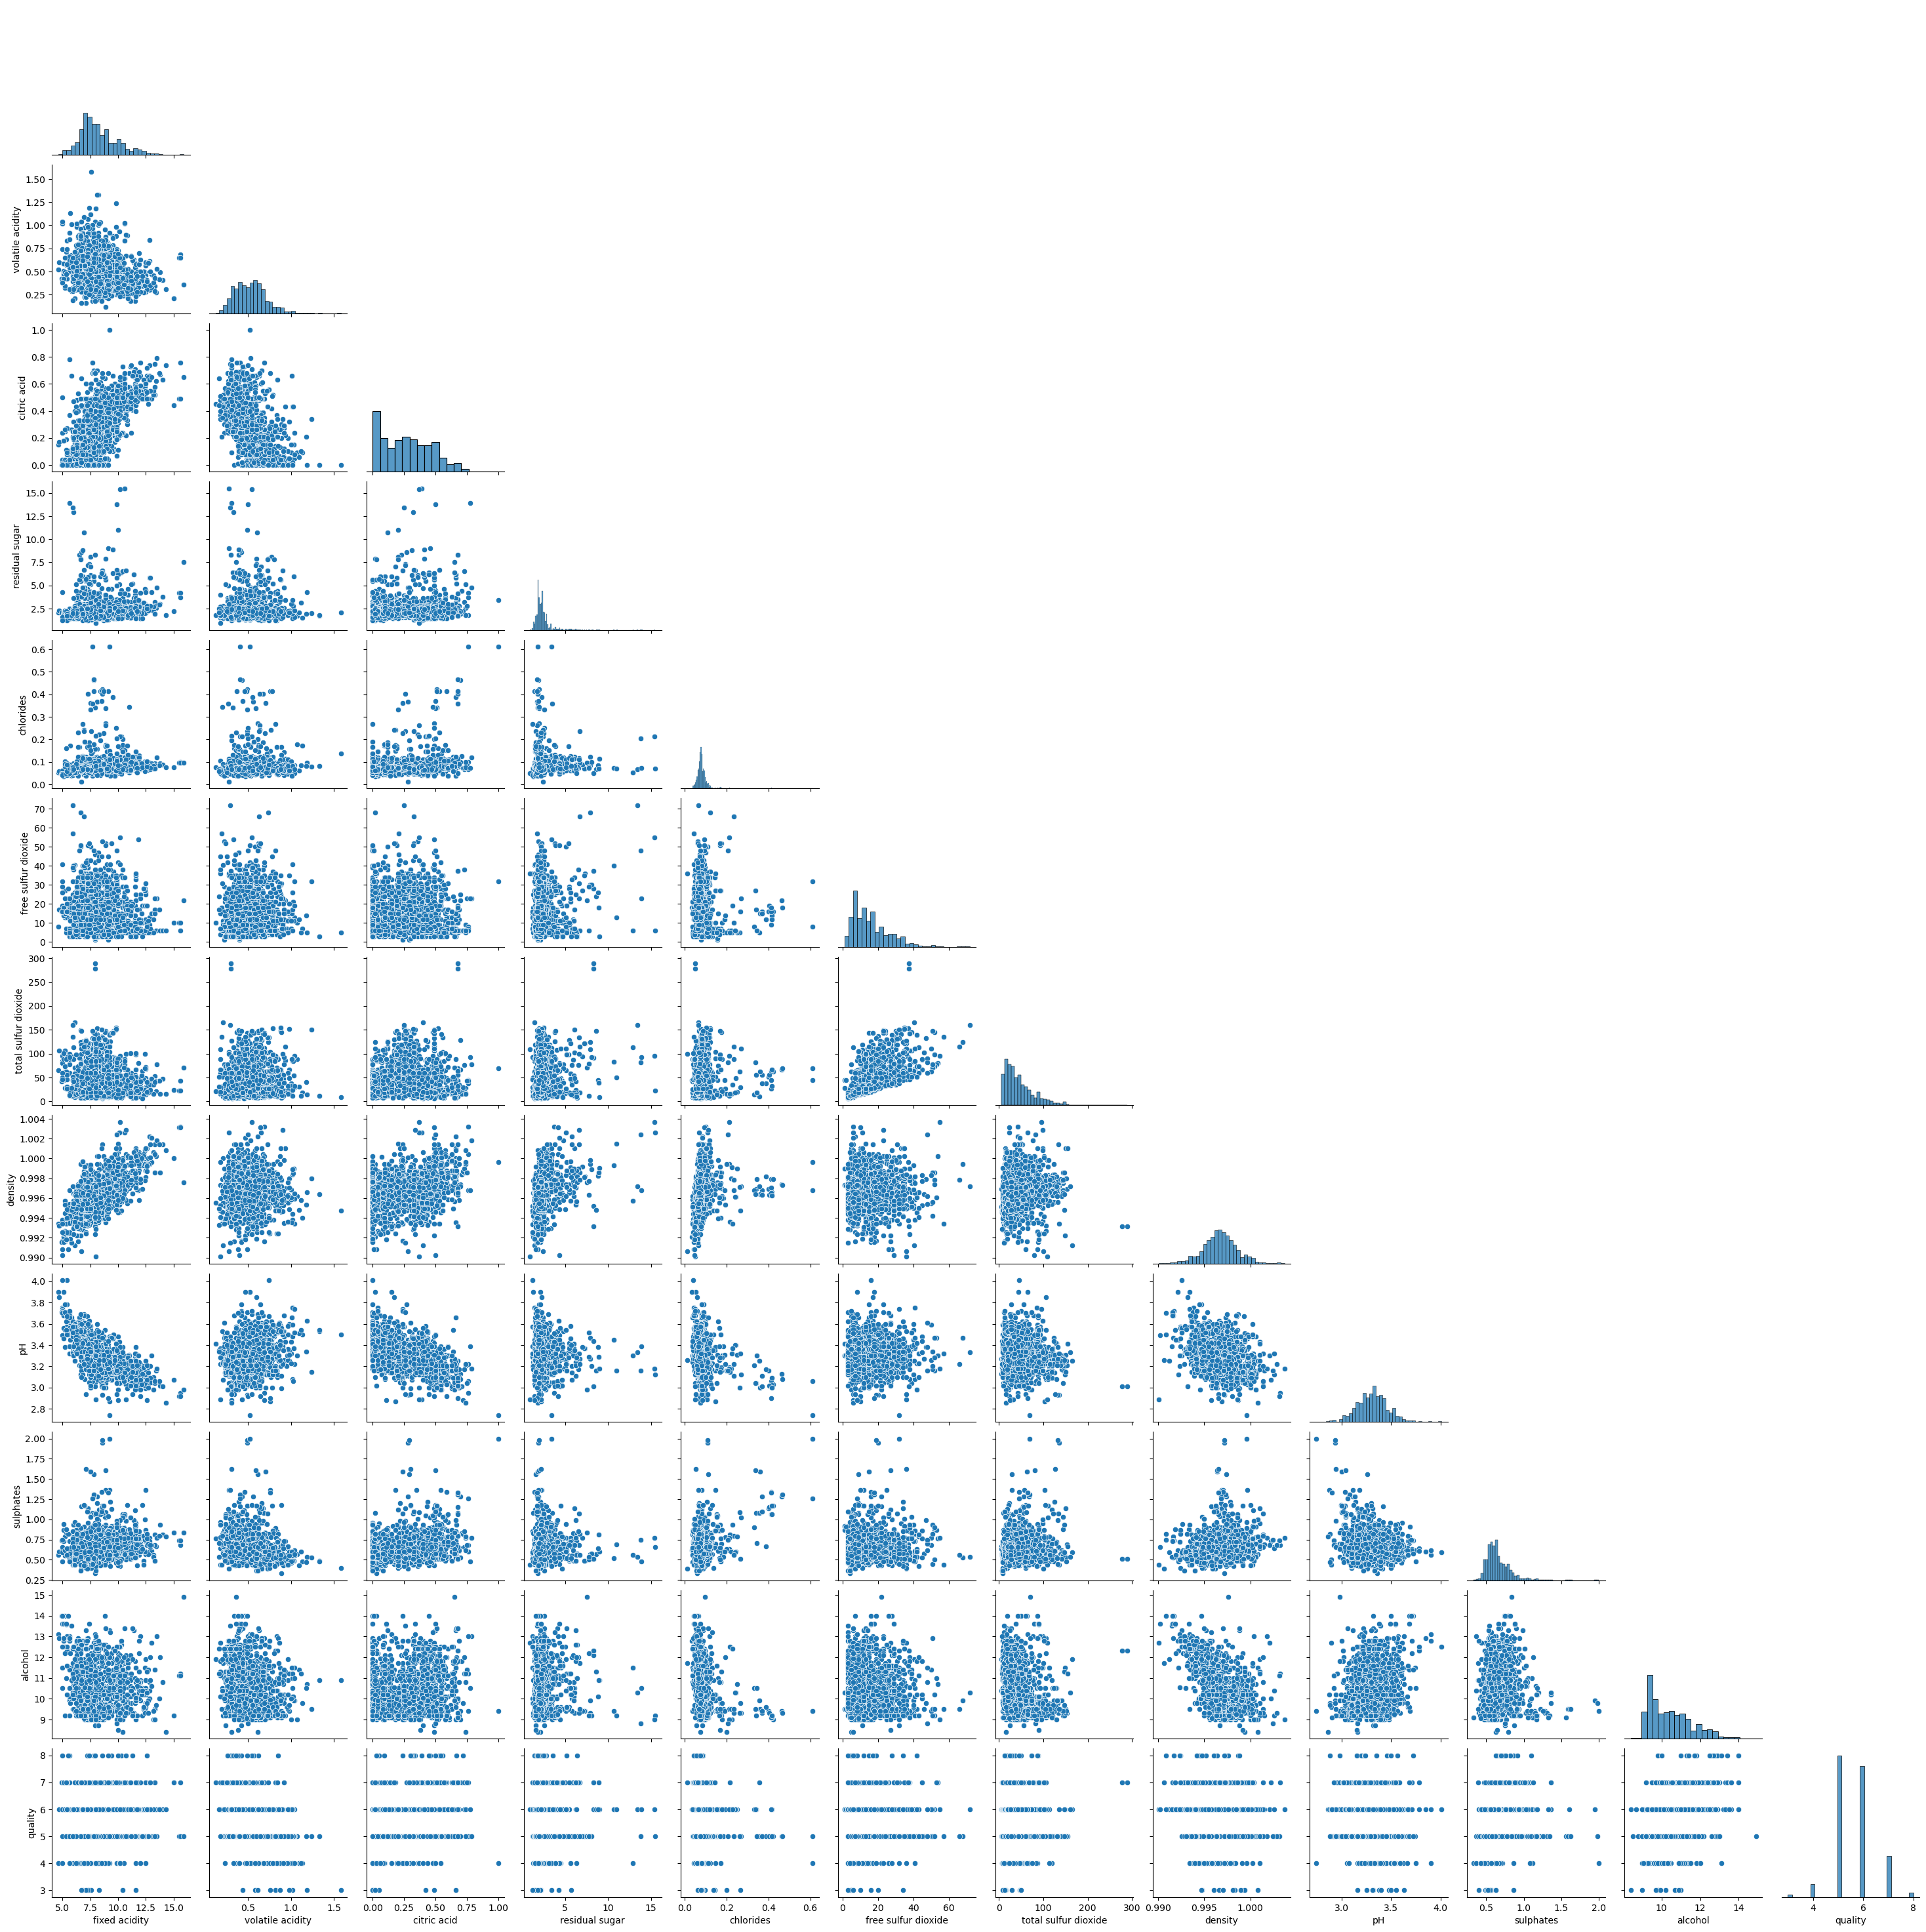

In [18]:
# Create a pair plot of the red wine dataset
sns.pairplot(data, corner=True)
plt.show()

- The pair plot shows scatter plots of each pair of variables in the red wine dataset, as well as histograms of each variable along the diagonal. By looking at the scatter plots, we can see the relationship between two variables, while the histograms show the distribution of each variable. This allows us to identify patterns and relationships between different variables in the red wine dataset.

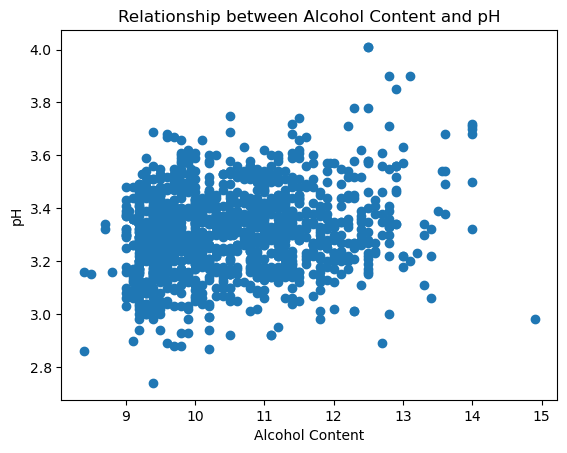

In [19]:
# Create a scatter plot of alcohol content and pH
plt.scatter(data['alcohol'], data['pH'])
plt.xlabel('Alcohol Content')
plt.ylabel('pH')
plt.title('Relationship between Alcohol Content and pH')
plt.show()

- The scatter plot shows that there is a weak positive correlation between 
alcohol content and pH in the red wine dataset, with wines with higher alcohol content having slightly higher pH levels. However, the relationship between these variables is not very strong, suggesting that alcohol content and pH may not be important predictors of red wine quality.






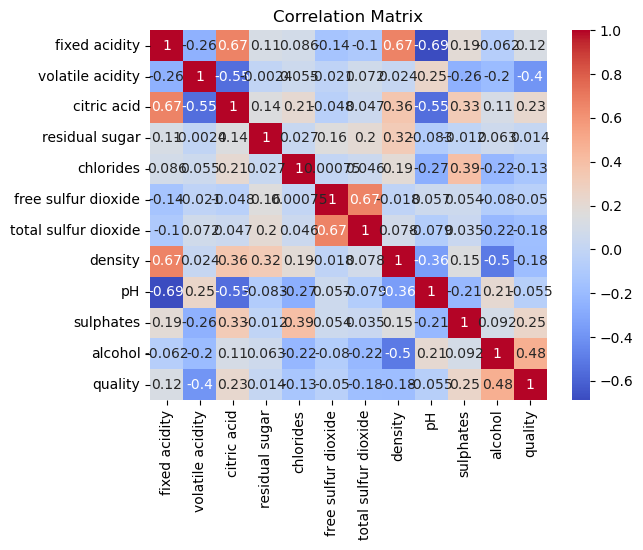

In [20]:
# Create a heatmap of the correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- The correlation analysis shows that alcohol, sulphates, and citric acid have positive correlations with red wine quality, whereas volatile acidity, total sulfur dioxide, and density have negative correlations. However, the strength of the correlations varies, with Citric acid, Fixed Acidity and Density having the strongest negative correlation around 0.67. These findings even with above 0.5 is not suffissiant to confirm any causality between those features.






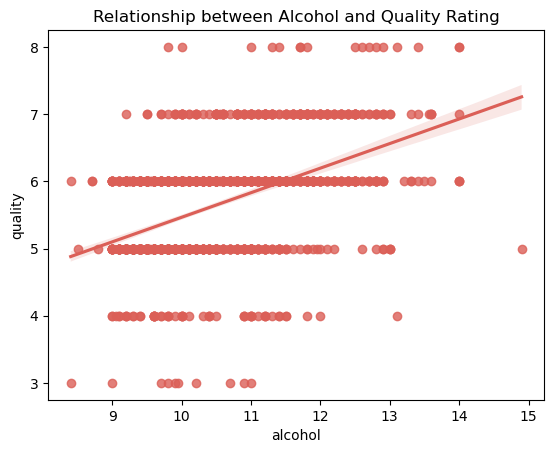

In [21]:
palette = sns.color_palette("hls", 3)

sns.regplot(x='alcohol', y='quality', data=data, color=palette[0])
plt.title('Relationship between Alcohol and Quality Rating')
plt.show()

- We can indicate a strong positive relationship between __alcohol__ and __quality__. The higher alcohol, the better quality, obviously.

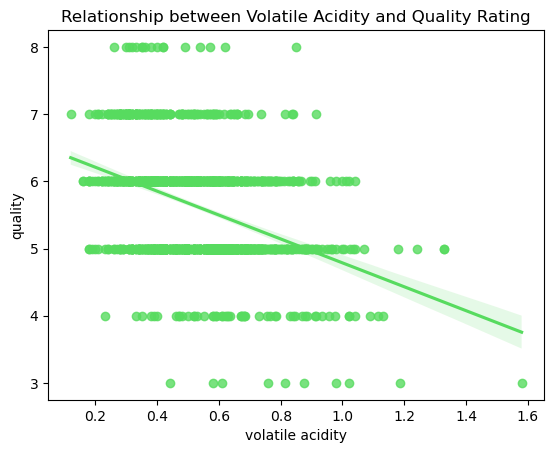

In [22]:
sns.regplot(x='volatile acidity', y='quality', data=data, color=palette[1])
plt.title('Relationship between Volatile Acidity and Quality Rating')
plt.show()

- There is a strong negative relationship between __volatile acidity__ and __quality__. If we can reduce the amount of volatile acids in the wine, we can get a better wine quality.

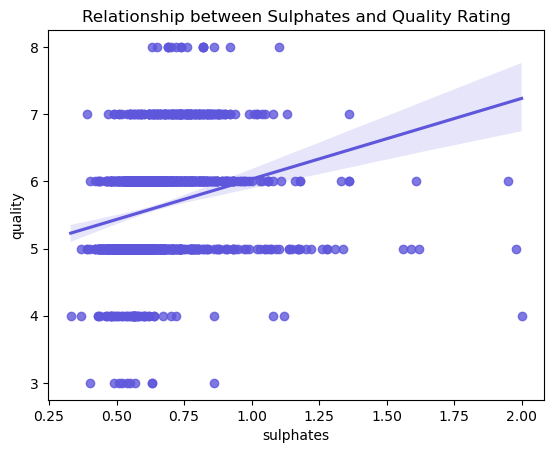

In [23]:
sns.regplot(x='sulphates', y='quality', data=data, color=palette[2])
plt.title('Relationship between Sulphates and Quality Rating')
plt.show()

- Along with the increase of alcohol, if we can improve the amount of sulphates in the wine, the wine can be better.

- Scaling the red wine dataset is not necessary for some classification methods such as Naïve Bayes, Random Forests, and Decision Trees, as these algorithms are not sensitive to the scale of the input data. However, scaling can still improve model performance and ensure that all features contribute equally to the model.






For Naive Bayes, let's categorize the quality variable such that lower than 4 is 
considered low, 5-6 is considered medium, and 7-10 is considered high.

In [24]:
from sklearn.naive_bayes import GaussianNB

# Divide wine quality scores into three categories
bins = [0, 4, 6, 10]
labels = ['low', 'medium', 'high']
data['quality_cat'] = pd.cut(data['quality'], bins=bins, labels=labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop(['quality', 'quality_cat'], axis=1), data['quality_cat'], test_size=0.2, random_state=42)

# Train a Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = gnb.predict(X_test)

# Calculate the accuracy of the classifier
print('Naive Bayes Model Accuracy:', accuracy_score(y_test, y_pred))


Naive Bayes Model Accuracy: 0.7941176470588235


Let's create the confusion matrix using the seaborn library:



In [25]:
# Let's create a classification report:

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Print classification report
print("Naive Bayes Model - Classification Report:\n", class_report)


Naive Bayes Model - Classification Report:
               precision    recall  f1-score   support

        high       0.45      0.68      0.54        34
         low       0.40      0.27      0.32        15
      medium       0.90      0.85      0.87       223

    accuracy                           0.79       272
   macro avg       0.58      0.60      0.58       272
weighted avg       0.81      0.79      0.80       272



The accuracy of the Naive Bayes model for the red wine dataset with the updated quality categorization is 0.815625. This indicates that the model correctly predicts the wine quality category 81.56% of the time. However, the precision and recall values for the 'low' quality category are low, indicating that the model may not perform as well for this category.

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Calculate the accuracy of the classifier
print('Random Forest Model Accuracy:', accuracy_score(y_test, y_pred))

# Generate classification report
class_report = classification_report(y_test, y_pred, zero_division=0)

# Print classification report
print("Random Forest Model - Classification Report:\n", class_report)

Random Forest Model Accuracy: 0.8455882352941176
Random Forest Model - Classification Report:
               precision    recall  f1-score   support

        high       0.67      0.41      0.51        34
         low       0.00      0.00      0.00        15
      medium       0.86      0.97      0.91       223

    accuracy                           0.85       272
   macro avg       0.51      0.46      0.47       272
weighted avg       0.79      0.85      0.81       272



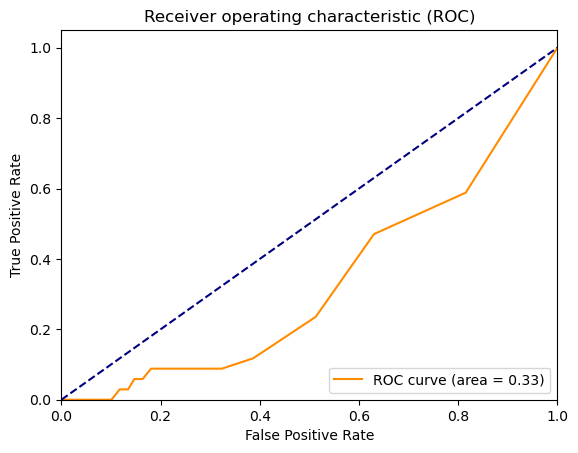

In [27]:
#ROC curve plot:
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate and true positive rate
y_pred_prob = rf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label='high')
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

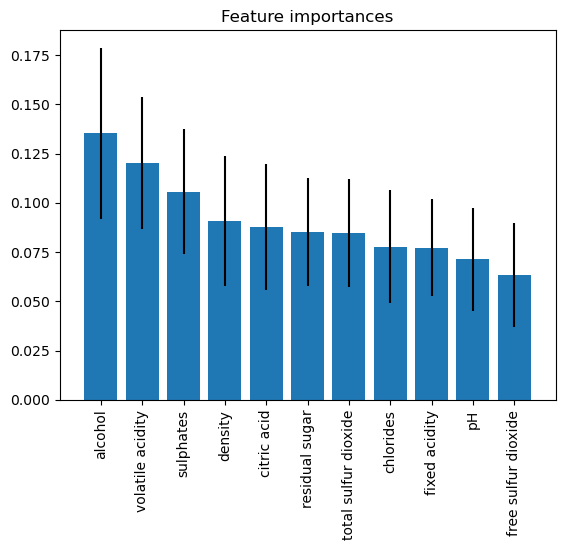

In [28]:
#features important plot
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()


In [29]:
#decision tree
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dtc.predict(X_test)

# Calculate the accuracy of the classifier
print('Decision Tree Model Accuracy:', accuracy_score(y_test, y_pred))

# Print the classification report
report = classification_report(y_test, y_pred)
print("Decision Tree Model - Classification Report:\n", report)


Decision Tree Model Accuracy: 0.7830882352941176
Decision Tree Model - Classification Report:
               precision    recall  f1-score   support

        high       0.45      0.44      0.45        34
         low       0.25      0.27      0.26        15
      medium       0.87      0.87      0.87       223

    accuracy                           0.78       272
   macro avg       0.52      0.53      0.53       272
weighted avg       0.78      0.78      0.78       272



Based on the accuracy scores, we can conclude that the random forest classifier performs the best among the three algorithms (decision tree, random forest, and naive Bayes) for the red wine dataset. The Random Forest Classifier achieves an accuracy of 85 percent, which is higher than the Decision Tree (78 percent) and Naive Bayes (79 percent). However, we should also consider other evaluation metrics and compare the models on those metrics before making a final conclusion.

Based on our analysis, __alcohol__, __volatile acidity__, and __sulphates__ are the top three features that affect significantly the quality of wine. It suggests that in order to get a good wine, we need to increase the quality of alcohol as well as sulphates, and try to reduct the amount of volatile acidity.  